In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,r2_score

sns.set_theme(style='darkgrid', rc={'axes.linewidth':1, 'axes.edgecolor':'black'})

# Creating the data

In [25]:
x = np.arange(100).reshape(-1, 1)
y = np.array([0]*100)
y[-40:] = np.array([1]*40)

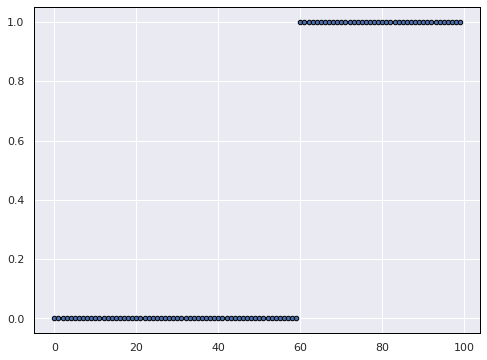

In [26]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(8,6))

ax.scatter(x,y,edgecolors='black',s=20);

# Building Logistic Regression with Sklearn

In [4]:
classifier = LogisticRegression(solver='liblinear', random_state=101)
classifier.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=101, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
coef = classifier.coef_[0][0]
const = classifier.intercept_[0]

loss = []
for num in x:
  loss.append(1/(1+math.exp(-1*(num*coef + const))))
loss = np.array(loss)

In [6]:
#error finding func
def finding_false(loss,y):
  false_results = []

  for i in range(len(x)):
    #false positive
    if y[i]==0 and loss[i]>=0.5:
      false_results.append(y[i])
    #false negative
    elif y[i]==1 and loss[i]<0.5:
      false_results.append(y[i])
    #true positive & true negative
    else:
      false_results.append(None)

  return false_results
    

In [7]:
mistakes = finding_false(loss,y)

#Visualization

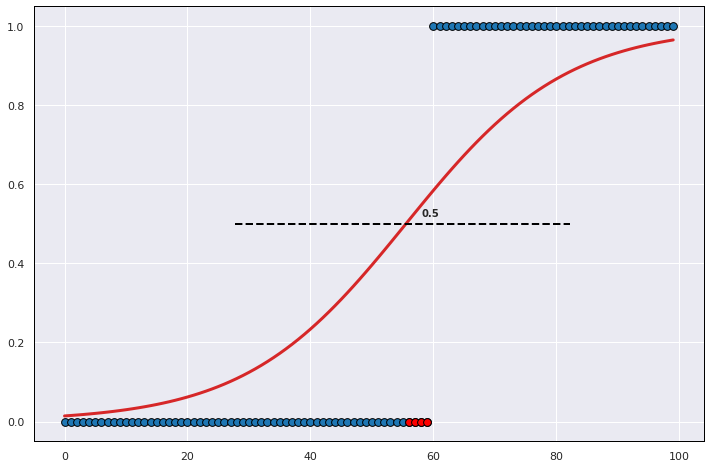

In [8]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,8))

ax.scatter(x,y,edgecolors='black',s=60,color='tab:blue')
ax.plot(x, loss, color='tab:red', linewidth=3);
ax.scatter(x, mistakes, edgecolors='black',s=60,color='red')
ax.axhline(y=.5,xmin=.3,xmax=.8,ls='--',linewidth=2, color='black')
ax.text(x=58,y=0.52,s='0.5',weight='bold');

#Metrics
#### classification report, confusion matrix, R^2 and Adjusted R^2

In [22]:
print(f"confusion matrix\n {confusion_matrix(y,classifier.predict(x))}\n\n")
print(f"classification report\n {classification_report(y,classifier.predict(x))}\n\n")

confusion matrix
 [[56  4]
 [ 0 40]]


classification report
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        60
           1       0.91      1.00      0.95        40

    accuracy                           0.96       100
   macro avg       0.95      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100





creating and adjusted R^2 func

In [23]:
def adjusted_r2(y_test, y_pred, X, k=1):
  #k is number of explaining variables (i.e default is 1), n is length of data points.
  if len(X.shape) > 1:
    k = X.shape[1]
  n = len(X)
  r2 = r2_score(y_test, y_pred)
  return 1-(1-r2)*((n-1)/(n-k-1))

In [24]:
r2_score(y, classifier.predict(x))

0.8333333333333333

In [21]:
adjusted_r2(y,classifier.predict(x),x)

0.8316326530612245